In [1]:
!pip install selenium

In [6]:
# !pip install opencv-python
!pip install matplotlib

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

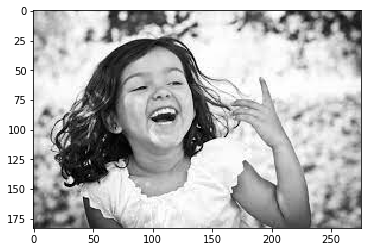

In [71]:
data_dir = "D:\Final Year Project\dataset"
emotions = ["happy", "sad"]

for emotion in emotions:
    path = os.path.join(data_dir, emotion)                         #path = "D:\Final Year Project\dataset\happy"
    for img in os.listdir(path):                                #looping through images
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)       #to convert the img to grayscale to reduce size
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

In [75]:
print(img_array.shape)

(183, 276)


(200, 200)


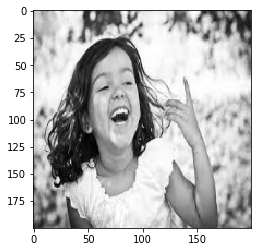

In [87]:
#RESIZE THE IMAGES

new_array = cv2.resize(img_array, (200,200))
print(new_array.shape)
plt.imshow(new_array, cmap='gray')
plt.show()

In [94]:
training_data = []

def create_training_data():
#     data_dir = "D:\Final Year Project\dataset"
#     emotions = ["happy", "sad"]

    for emotion in emotions:
        path = os.path.join(data_dir, emotion)
        num = emotions.index(emotion)
        
        for img in os.listdir(path):   
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (200,200))
                training_data.append([new_array, num])
            except Exception as e:
                pass
            
create_training_data()

In [96]:
print(len(training_data))

38


In [100]:
#shuffle the data to make NN learn better
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

1
1
0
0
0
1
1
1
0
1


In [104]:
X = [] 
Y = []

for features, labels in training_data:
    X.append(features)
    Y.append(labels)
    
#we can't just pass this list to NN, so convert this to numpy array
X = np.array(X).reshape(-1, 200, 200, 1)                 #this last 1 is for grayscale
print(X.shape)

(38, 200, 200, 1)


In [107]:
#Let's save the dataset
import pickle

xfilename = 'X.pickle'
yfilename = 'Y.pickle'

pickle.dump(X, open(xfilename, 'wb'))
pickle.dump(Y, open(yfilename, 'wb'))

In [109]:
#to load the it again

loaded_X = pickle.load(open(xfilename, 'rb'))
loaded_Y = pickle.load(open(yfilename, 'rb'))

print(loaded_Y)

[1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
